# Assessing DO Sensor Variability within the Coastal Endurance Array

**Evaluator: Aric Mine**

**Objective Summary:** My goal was to monitor and determine DO sensor stability during deployment and between locations. First I look at the Inshore and Offshore Surface Moorings within the Washington leg of the array. The goal is to observe the variability in DO measurements during and between deployments at these fixed-depth, stationary moorings. Second, I move to the offshore deep profiler to see if this sampling method is similarly sensitive to sensor drift between deployments. Thrid, I look at DO sensor drift over the course of a single deployment. Finally, I summarize the findings of these site contrasts to determine future best practices to maintain accurate, precise DO measurements. 


USERNAME = ''

TOKEN =  ''

The first step is to call up telemetered Inshore Surface Mooring (ISSM) data for DO from the Washington leg of Coastal Endurance

In [14]:
import requests

In [15]:
import xarray as xr

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
import pandas as pd
from io import StringIO

In [18]:
site = 'CE06ISSM'
node = 'RID16'
instrument = '03-DOSTAD000'
method = 'telemetered'
stream = 'dosta_abcdjm_ctdbp_dcl_instrument'

# API base url
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the full request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2016-10-25T00:00:00.000Z',
  'endDT':'2018-07-01T01:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [115]:
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()
print(data['allURLs'][0])


https://opendap.oceanobservatories.org/thredds/catalog/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/catalog.html


In [23]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/catalog.html'

import re
import os

In [6]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0008_CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument_20180328T183110.634000-20180630T223019.513000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0008_CE06ISSM-RID16-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument_20180328T183110.634000-20180630T223019.513000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0007_CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument_20171006T013116.568000-20180306T153008.134000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20

In [7]:
datasets_sel = []
for i in datasets:
    if '03-CTDBPC000' in i:
        pass
    else:
        datasets_sel.append(i)

In [8]:
datasets_sel

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0008_CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument_20180328T183110.634000-20180630T223019.513000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0007_CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument_20171006T013116.568000-20180306T153008.134000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T182635-CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument/deployment0006_CE06ISSM-RID16-03-DOSTAD000-telemetered-dosta_abcdjm_ctdbp_dcl_instrument_20170413T203523.501000-20170903T033524.150000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresn

In [9]:
ds = xr.open_mfdataset(datasets_sel)

In [10]:
ds

<xarray.Dataset>
Dimensions:                             (obs: 8771)
Coordinates:
  * obs                                 (obs) int64 0 1 2 3 4 5 6 7 8 9 10 ...
    time                                (obs) datetime64[ns] dask.array<shape=(8771,), chunksize=(1135,)>
    int_ctd_pressure                    (obs) float64 dask.array<shape=(8771,), chunksize=(1135,)>
    lat                                 (obs) float64 dask.array<shape=(8771,), chunksize=(1135,)>
    lon                                 (obs) float64 dask.array<shape=(8771,), chunksize=(1135,)>
Data variables:
    deployment                          (obs) int32 dask.array<shape=(8771,), chunksize=(1135,)>
    id                                  (obs) |S64 dask.array<shape=(8771,), chunksize=(1135,)>
    date_time_string                    (obs) object dask.array<shape=(8771,), chunksize=(1135,)>
    dcl_controller_timestamp            (obs) object dask.array<shape=(8771,), chunksize=(1135,)>
    dosta_ln_optode_oxygen     

In [11]:
dtime = ds['time'].values
temperature = ds['temp'].values
oxygen = ds['dissolved_oxygen'].values
salinity = ds['practical_salinity'].values
pressure = ds['int_ctd_pressure'].values


The next step will swap the obs and time dimensions to help plot a time series of 

In [12]:
ds = ds.swap_dims({'obs': 'time'}) 

# Sort the data
ds = ds.sortby('time'); 

# Optional, this is used to optimize data processing
ds = ds.chunk({'time': 100})

Text(0.5,2,'Inshore Surface Mooring, Washington (CE06ISSM)')

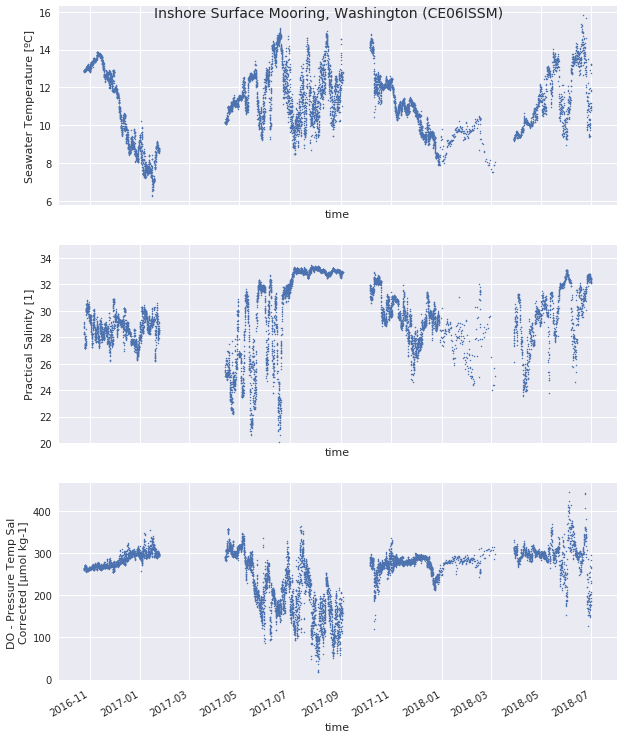

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True,figsize=(10,5))
ds['temp'].plot(ax=ax1, linestyle='None',marker='.',markersize=3)
ds['practical_salinity'].plot(ax=ax2,linestyle='None',marker='.',markersize=3)
ds['dissolved_oxygen'].plot (ax=ax3, linestyle='None',marker='.',markersize=3)
ax2.set_ylim(20,35)
fig.subplots_adjust(top = 2.0);
fig.suptitle('Inshore Surface Mooring, Washington (CE06ISSM)', x=0.5, y=2, fontsize=14)

This plots suggests drift in the oxygen sensors during specific deployments (notably Sept. 2017 and recently July. 2018) that tracks with seasonal mixing dynamics at this site. Next, we'll test this effect at the offshore mooring to determine if this variability is spatially continuous.

In [6]:
#investigating the DO profiles inshore and comparing them with offshore (below)
site = 'CE09OSSM'
node = 'RID27'
instrument = '04-DOSTAD000'
method = 'telemetered'
stream = 'dosta_abcdjm_dcl_instrument'

# API base url
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the full request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2016-10-25T00:00:00.000Z',
  'endDT':'2018-07-01T01:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


Here we call up the Offshore Surface Mooring data for the same time period of the Coastal Endurance Array

In [8]:
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()
print(data['allURLs'][0])



https://opendap.oceanobservatories.org/thredds/catalog/ooi/amine@csufresno.edu/20180802T151728-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/catalog.html


In [21]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/catalog.html'


In [22]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0007_CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20180326T014514.032000-20180429T123333.134000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0007_CE09OSSM-RID27-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument_20180326T014522.413000-20180427T183312.719000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0006_CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20171004T234526.092000-20180330T163332.994000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-0

In [24]:
datasets_sel = []
for i in datasets:
    if '03-CTDBPC000' in i:
        pass
    else:
        datasets_sel.append(i)

datasets_sel

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0007_CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20180326T014514.032000-20180429T123333.134000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0006_CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20171004T234526.092000-20180330T163332.994000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/deployment0005_CE09OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20170412T004514.179000-20171006T223332.704000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180801T204555-CE09OSSM-RID27

In [25]:
ds = xr.open_mfdataset(datasets_sel)

In [26]:
ds = ds.swap_dims({'obs': 'time'}) 

# Sort the data
ds = ds.sortby('time'); 

# Optional, this is used to optimize data processing
#ds2 = ds2.chunk({'time': 100})

Text(0.5,2,'Offshore Surface Mooring, Washington (CE09OSSM)')

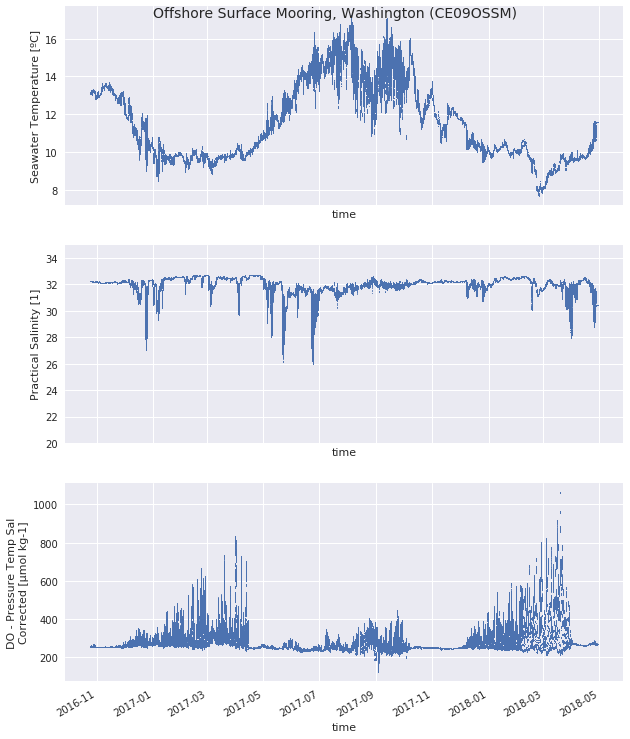

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True,figsize=(10,5))
ds['temp'].plot(ax=ax1, linestyle='None',marker='.',markersize=2)
ds['practical_salinity'].plot(ax=ax2, linestyle='None',marker='.',markersize=2)
ds['dissolved_oxygen'].plot (ax=ax3, linestyle='None',marker='.',markersize=2)
ax2.set_ylim(20,35)
fig.subplots_adjust(top = 2.0);
fig.suptitle('Offshore Surface Mooring, Washington (CE09OSSM)', x=0.5, y=2, fontsize=14)

Above you'll notice a similar trend between the bi-annual deployments. The sensors are initially stable, but within 3-4 months the variability of the sensors expand well beyond accepted limits. Variability falls well outside "reasonable" oxygen measurement maximums of ~400 umol/L. Here sensors appear to have fallen far out of calibration, far exceeding the surface ocean DO maximums. Shown below is data from the most recent deployment (March 2018).

In [28]:
dstemp = ds.sel(time=slice('2018-04-01','2018-08-01'))

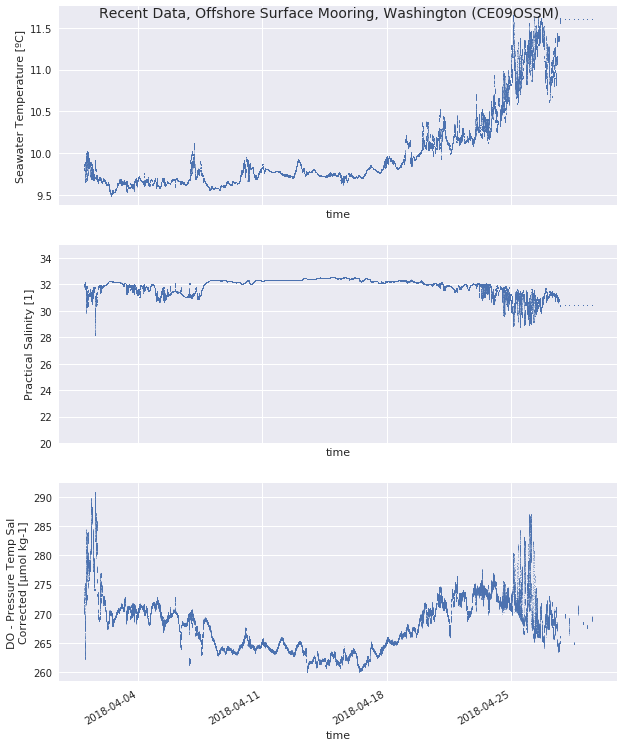

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True,figsize=(10,5))
dstemp['temp'].plot(ax=ax1,linestyle='None',marker='.',markersize=1)
dstemp['practical_salinity'].plot(ax=ax2, linestyle='None',marker='.',markersize=1)
dstemp['dissolved_oxygen'].plot (ax=ax3, linestyle='None',marker='.',markersize=1)
ax2.set_ylim(20,35)
fig.subplots_adjust(top = 2.0)
fig.suptitle("Recent Data, Offshore Surface Mooring, Washington (CE09OSSM)",x=0.5, y=2, fontsize=14);

The time series plot above of temperature, salinity, and DO measurements over the most recent deployment show a stable DO sensor that appears within calibration. New UV irradiation sensors on the DO sensors should relieve biofouling effects, but it is worh monitoring DO sensor stability over recent deployments to test if other variables might contribute to instrument failure. 

In [2]:
USERNAME = ''
TOKEN =  ''

In [4]:
site = 'CE09OSPM'
node = 'WFP01'
instrument = '02-DOFSTK000'
method = 'telemetered'
stream = 'dofst_k_wfp_instrument'

# API base url
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the full request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2016-10-25T00:00:00.000Z',
  'endDT':'2018-07-01T01:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [ ]:
# commented out to prevent constant link requests
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()
# print(data['allURLs'][0])

In [24]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/catalog.html'


In [25]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]

In [26]:
datasets_sel = []
for i in datasets:
    if '03-CTDPFK000' in i:
        pass
    else:
        datasets_sel.append(i)

In [27]:
datasets_sel

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/deployment0009_CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument_20180326T230003-20180630T231857.996302.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/deployment0008_CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument_20171004T200003-20180326T191155.996194.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/deployment0007_CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument_20170412T210003-20170703T191041.995805.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/de

Similar to the above code, we're looking exclusively at DO sensor data. This bit of code has ensured it is subsampled from the above files.

In [28]:
d8='https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/deployment0008_CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument_20171004T200003-20180326T191155.996194.nc'
d9='https://opendap.oceanobservatories.org/thredds/dodsC/ooi/amine@csufresno.edu/20180802T142833-CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument/deployment0009_CE09OSPM-WFP01-02-DOFSTK000-telemetered-dofst_k_wfp_instrument_20180326T230003-20180630T231857.996302.nc'

In [29]:
ds_d8=xr.open_dataset(d8)
ds_d9=xr.open_dataset(d9)

d8 and d9 are the deployments I test drift on the above profiler. DO sensor measurements will be compared to at the end of deployment 8 to the DO sensor measurements at the beginning of deployment 9 to assess drift over deployment 8 and the quality of deployment 9's calibration of the DO sensor profiler. 

In [30]:
ds = xr.open_mfdataset(datasets_sel)

In [ ]:
ds = ds.swap_dims({'obs': 'time'}) 
ds_d8 = ds_d8.swap_dims({'obs': 'time'}) 
ds_d9 = ds_d9.swap_dims({'obs': 'time'}) 

# Sort the data
ds = ds.sortby('time') 
ds_d8 = ds_d8.sortby('time')  
ds_d9 = ds_d9.sortby('time') 

In [ ]:
dtime = ds['time'].values
temperature = ds['ctdpf_ckl_seawater_temperature'].values
oxygen = ds['dofst_k_oxygen_l2'].values
salinity = ds['practical_salinity'].values
pressure = ds['int_ctd_pressure'].values

The plot below is a time series of temperature, salinity, and oxygen over the course of the last two years. 

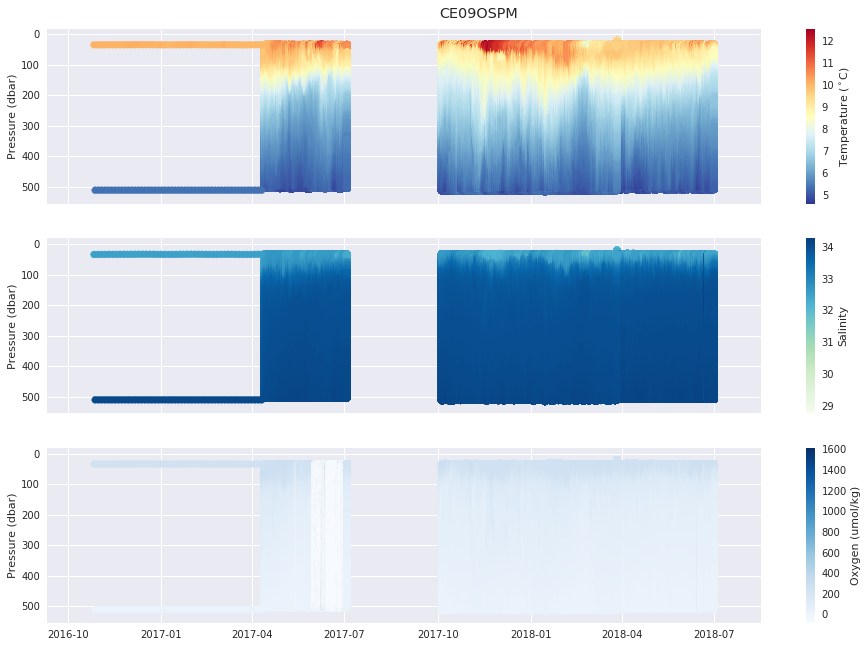

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,10))
sc1 = ax1.scatter(dtime, pressure, c=temperature, cmap='RdYlBu_r') 
sc2 = ax2.scatter(dtime, pressure, c=salinity, cmap='GnBu')
sc3 = ax3.scatter(dtime, pressure, c=oxygen, cmap='Blues')


# Because the X and Y axes are shared, we only have to set limits once
ax1.invert_yaxis() # Invert y axis
# ax1.set_xlim(dtime[0],dtime[-1]) # Set the time limits to match the dataset

cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')

cbar = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar.ax.set_ylabel('Salinity') 

cbar = fig.colorbar(sc3, ax=ax3, orientation='vertical')
cbar.ax.set_ylabel('Oxygen (umol/kg)')


ax1.set_ylabel('Pressure (dbar)')
ax2.set_ylabel('Pressure (dbar)')
ax3.set_ylabel('Pressure (dbar)')

fig.suptitle('Offshore Profiling Mooring Washington CE09OSPM')
fig.subplots_adjust(top=0.95);

The beginning data has been annotated as an unoperational period prior to March 2017. Between mid July 2017 and October 2017 no data is available. There is however immense variablity (above 400 umol/kg) in the oxygen sensor data in the April 2017 to July 2017 data similar to what was seen above with the stationary moorings. Next, I've focused exclusively DO data from this profiler since October 2017. We have continuous data from this point forward within the expected range of DO.

In [ ]:
dstemp = ds.sel(time=slice('2017-10-01','2018-07-01'))

In [ ]:
dtime = dstemp['time'].values
temperature = dstemp['ctdpf_ckl_seawater_temperature'].values
oxygen = dstemp['dofst_k_oxygen_l2'].values
salinity = dstemp['practical_salinity'].values
pressure = dstemp['int_ctd_pressure'].values

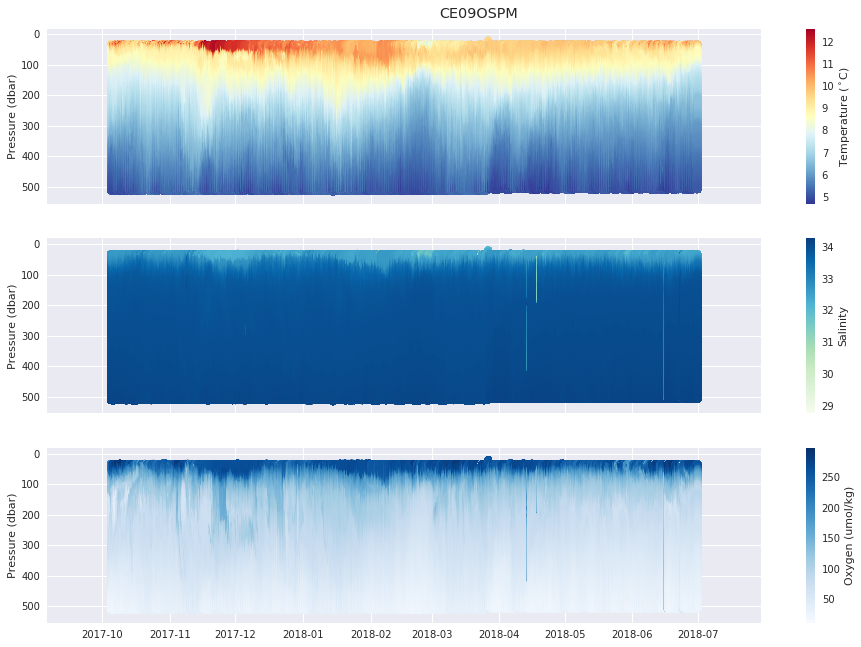

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,10))
sc1 = ax1.scatter(dtime, pressure, c=temperature, cmap='RdYlBu_r') 
sc2 = ax2.scatter(dtime, pressure, c=salinity, cmap='GnBu')
sc3 = ax3.scatter(dtime, pressure, c=oxygen, cmap='Blues')


# Because the X and Y axes are shared, we only have to set limits once
ax1.invert_yaxis() # Invert y axis
# ax1.set_xlim(dtime[0],dtime[-1]) # Set the time limits to match the dataset

cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')

cbar = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar.ax.set_ylabel('Salinity') 

cbar = fig.colorbar(sc3, ax=ax3, orientation='vertical')
cbar.ax.set_ylabel('Oxygen (umol/kg)')


ax1.set_ylabel('Pressure (dbar)')
ax2.set_ylabel('Pressure (dbar)')
ax3.set_ylabel('Pressure (dbar)')

fig.suptitle('CE09OSPM')
fig.subplots_adjust(top=0.95);

Oxygen falls within the expected data range of the entire time Oct. 2017 to Jul. 2018 period. This suggests that perhaps profiler oxygen data is not subject to the same mechanism of calibration failure, be that biofouling or inshore sedmient mixing that a fixed mooring might be more influenced by. To investigate this more, we'll select the end of deployment 8/beginning of deployment 9 (March 26, 2018) as a time window to contrast instrument drift over the course of a single deployment. We can then select and compare the CTD profile from those deployments to the profiler data collected immediately before and after deployment. 

In [3]:
f='skq201808s_ctd001.cnv'
ctdfile = open(f, 'rb')
ctdfile = StringIO(ctdfile.read().decode(encoding='utf-8', errors='replace'))
header1, header2 = [], []
for k, line in enumerate(ctdfile.readlines()):
    if '# name ' in line:
        line = line.rstrip('\r\n')
        name, desc = line.split('=')[1].split(':')
        if name in [u' sigma-\ufffd00', u' sigma-\ufffd11']:
            name = 'sigma'
#         header1.append(str(name).lstrip())
        header2.append(str(desc).lstrip())

    if '*END*' in line:
        skiprows = k + 1

ctdfile.seek(0)
cctddf = pd.read_table(ctdfile, names=header2, index_col=None, skiprows=skiprows, delim_whitespace=True, header=None) 
# cctddf.columns = pd.MultiIndex.from_tuples(zip(cctddf.columns, header2))
# cctddf = cctddf.rename(columns={4:'Pressure', 11:'Oxygen'})



This above line loads in the cnv file of CTD from deployment 9 cruise. Be careful of the header identifiers and the spacing within the header.

In [4]:
pressure = cctddf.iloc[:,3]

In [5]:
oxygen = cctddf.iloc[:,11]

Text(0.5,0.98,'Deployment 9 CTD, DO Calibration Cast for CE09OSPM')

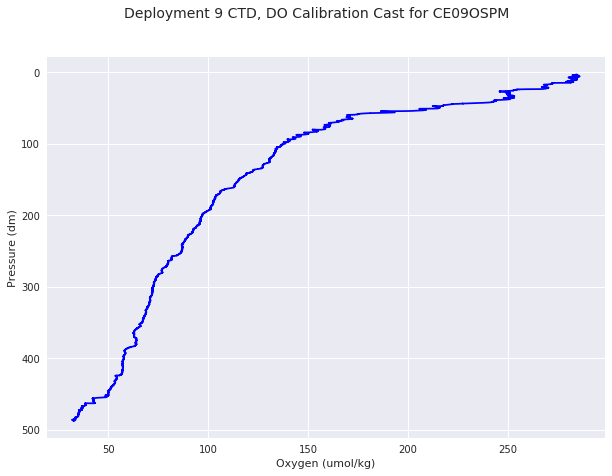

In [11]:
fig, (ax1) = plt.subplots(figsize=(10,7))

ax1.plot(oxygen,pressure,'b')
# ax1.plot(p_temp,p_pr,'r.')
ax1.set_xlabel('Oxygen (umol/kg)')
ax1.set_ylabel('Pressure (dm)')
ax1.invert_yaxis()
fig.suptitle('Deployment 9 CTD, DO Calibration Cast for CE09OSPM', fontsize=14)
# ax1.set_ylim(475,0)

# ax2.plot(cruise_data.Salinity,cruise_data.Pressure,'b',label='Cruise CTD')
# ax2.plot(p_sal,p_pr,'r.',label='Pioneer Profiler')
# ax2.set_xlabel('Salinity (psu)')

# fig.suptitle('CP02PMUO Compared with Shipboard CTD on 10/24/2017')
# fig.subplots_adjust(top=0.9)

# legend = ax2.legend(loc='lower right', shadow=True, fontsize='small');



Above is the CTD data collected following the recovery of deployment 8 instruments, prior to deploying and calibrating deployment 9 instruments. We'll compare this data against the preceding and subsequent profiler datasets across the same depth range.

In [29]:
ds9slice = ds_d9.sel(time=slice('2018-03-26 20:00:00','2018-03-26 23:59:59'))

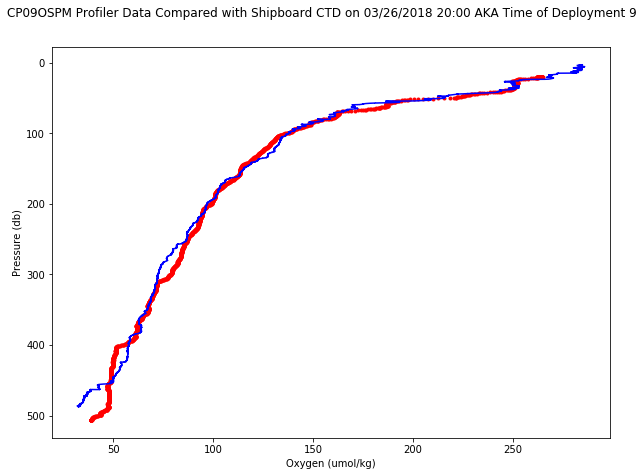

In [31]:
#comparing to the beginning of deployment 9
fig, (ax1) = plt.subplots(figsize=(10,7))

ax1.plot(ds9slice['dofst_k_oxygen_l2'].values, ds9slice['int_ctd_pressure'].values,'r.')#profiler data deployment 9
ax1.plot(oxygen,pressure,'b') #cruise ctd data
ax1.set_xlabel('Oxygen (umol/kg)')
ax1.set_ylabel('Pressure (db)')
ax1.invert_yaxis()
# ax1.set_ylim(475,0)


fig.suptitle('CP09OSPM Profiler Data Compared with Shipboard CTD on 03/26/2018 20:00 AKA Time of Deployment 9')
fig.subplots_adjust(top=0.9)

# legend = ax2.legend(loc='lower right', shadow=True, fontsize='small');



The red line represents the profiler data from deployment 9, which is in agreement with the CTD cast throughout most of the water column. However, given the recent calibration of the DO sensor with this CTD, it is concerning that the data below 400 m is offset.

In [32]:
ds8slice = ds_d8.sel(time=slice('2018-03-26 15:00:00','2018-03-26 20:00:00'))

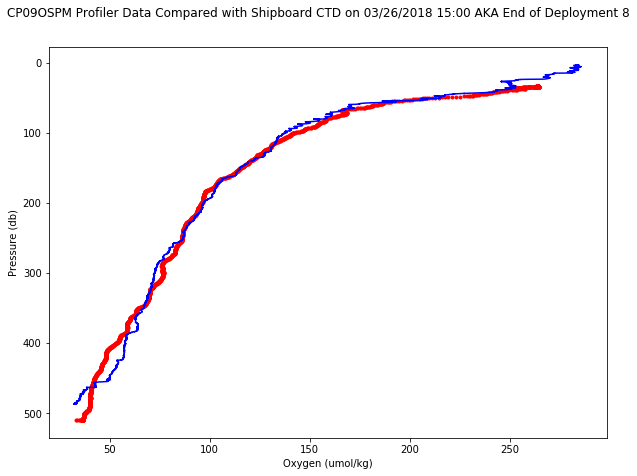

In [34]:
fig, (ax1) = plt.subplots(figsize=(10,7))

ax1.plot(ds8slice['dofst_k_oxygen_l2'].values, ds8slice['int_ctd_pressure'].values,'r.')#profiler data
ax1.plot(oxygen,pressure,'b') #cruise data
ax1.set_xlabel('Oxygen (umol/kg)')
ax1.set_ylabel('Pressure (db)')
ax1.invert_yaxis()
# ax1.set_ylim(475,0)


fig.suptitle('CP09OSPM Profiler Data Compared with Shipboard CTD on 03/26/2018 15:00 AKA End of Deployment 8')
fig.subplots_adjust(top=0.9)



The above graph is comparing deployment 8's last DO profile against the same CTD cast. The data are in good agreement through the thermocline, but the shallow and deep portions of the cast are out of calibration. This might be expected given instrumental drift of the DO sensor over the course of the six month deployment. It would be valuable to monitor this depth and time discrepancy at several sites and over several time periods to determine if there is a mathematical drift correction.

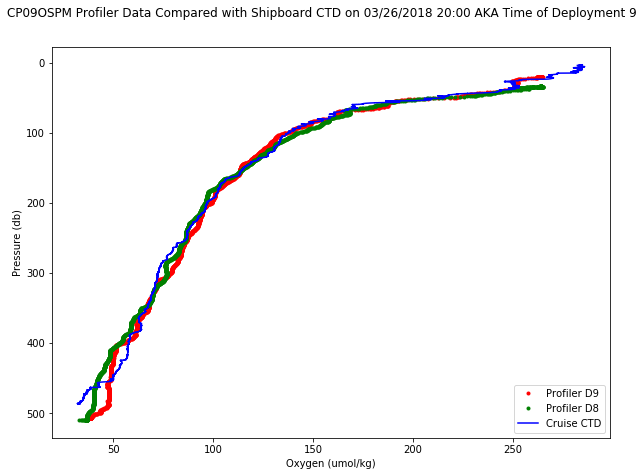

In [36]:
fig, (ax1) = plt.subplots(figsize=(10,7))

ax1.plot(ds9slice['dofst_k_oxygen_l2'].values, ds9slice['int_ctd_pressure'].values,'r.', label = 'Profiler D9')#profiler data deployment 9
ax1.plot(ds8slice['dofst_k_oxygen_l2'].values, ds8slice['int_ctd_pressure'].values,'g.', label = 'Profiler D8')#profiler data deployment 8
ax1.plot(oxygen,pressure,'b', label = 'Cruise CTD') #cruise data
legend = ax1.legend(loc = 'lower right')
ax1.set_xlabel('Oxygen (umol/kg)')
ax1.set_ylabel('Pressure (db)')
ax1.invert_yaxis()
# ax1.set_ylim(475,0)


fig.suptitle('CP09OSPM Profiler Data Compared with Shipboard CTD on 03/26/2018 20:00 AKA Time of Deployment 9')
fig.subplots_adjust(top=0.9)



Viewed as a single graphic, the discrepancies between the CTD cast and the two deployments are most obvious. Following the recent calibration, profiler 9 data is in good agreement through most of the water column, while profiler 8 is offset from cruise CTD data below 200 m. 

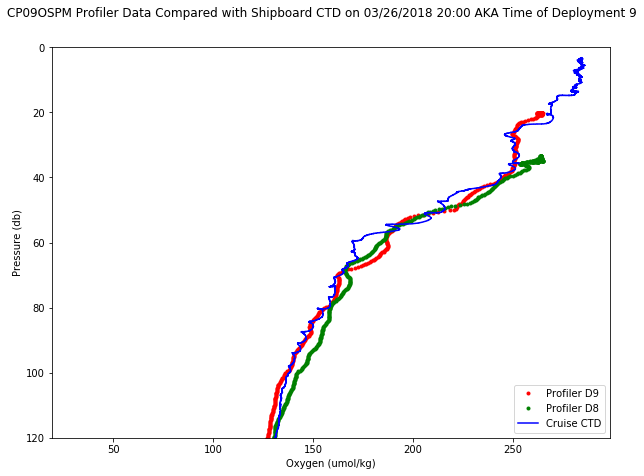

In [37]:
fig, (ax1) = plt.subplots(figsize=(10,7))

ax1.plot(ds9slice['dofst_k_oxygen_l2'].values, ds9slice['int_ctd_pressure'].values,'r.', label = 'Profiler D9')#profiler data deployment 9
ax1.plot(ds8slice['dofst_k_oxygen_l2'].values, ds8slice['int_ctd_pressure'].values,'g.', label = 'Profiler D8')#profiler data deployment 8
ax1.plot(oxygen,pressure,'b', label = 'Cruise CTD') #cruise data
legend = ax1.legend(loc = 'lower right')
ax1.set_xlabel('Oxygen (umol/kg)')
ax1.set_ylabel('Pressure (db)')
ax1.invert_yaxis()
ax1.set_ylim(120,0)


fig.suptitle('CP09OSPM Profiler Data Compared with Shipboard CTD on 03/26/2018 20:00 AKA Time of Deployment 9')
fig.subplots_adjust(top=0.9)



If we zoom in on the upper 120 m of the cast, the new calibratied profiler 9 instrument is clearly tracking the CTD cast data in the surface ocean. The profiler from deployment 8 only tracks CTD DO in the 50-70m depth range.

**Conclusions: Summary of Findings**

(1) Fouling is problematic to DO sensors at both inshore and offshore mooring sites (similar depth) regardless of the water depth along the Washington portion of the Coastal Endurance Array. 

(2) Recent efforts to episodically UV irradiate the DO sensor appear to be successful over the most recent deployment along the Washington leg of the Coastal Endurance array. This is noted when comparing the most recent three months of mooring data against the previous deployments. It is worth monitoring and contrasting these datasets to inform future decision making on DO sensor maintenance. 

(3) The offshore profiler appears to have reduced sensitivity to fouling over the past two years, perhaps due to the mobility of the instrument platform. The time series plots of DO suggest that the sensors are collecting data within specifications across several deployments. However, upon closer look sensor calibration should be carefully monitored and perhaps modulated in real-time to assist against drift.  

(4) When comparing the profiler data to CTD data at the same location there does appear to be drift over the course of the six month deployment. Following a six-month deployment instrumental drift occurs throughout the water column with no uniform variablity about the cruise CTD data used to calibrate the profiler instrumentation. Fortunately, recently calibrated and deployed instruments appear to hold their calibration following deployment. This supports future study of the temporal and spatial variability of the DO sensors during deployment. 

(5) If time permitted I would complete a more detailed assessment that compares DO profiler data against the CTD datasets during recovery at many sites over many deployments within OOI to determine if a uniform trend or mathematical relationship exists. If such a relationship existed, it would allow one to correct DO calibrations in real-time to prevent sensor drift. 